# AirBnB data project

I decided to choose this project out of my curiosity. I used to work in hospitality industry, and the rise of Airbnb which affects hotel sales greatly intrigued me. So, I decided to use this as my project. The project will be divided into several parts:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deploy

## Business Understanding
As a former hotelier, Airbnb always intrigued me. The company uses a crowdsourcing model to 'replace' hotel and provide hosts' properties to travelers in need. Of course, using this model, the traveling cost becomes significantly cheaper since they are no longer required to pay fees such as service charge. 

As a traveler, I use Airbnb a lot. However, there are some properties that are just 'not up to hospitality standard'. From my experience, they didn't provide guests with necessary amenities, or failed to be trustworthy in describing the location. This proved to have dramatic impact on my future decision, as I'm not returning back to those properties. I even told my friends not to use these properties. Furthermore, I decided to give them poor ratings which I think will impact prospective customers' decision to use these properties.

By doing this project, I'm hoping that I can give inputs to present and future Airbnb hosts regarding how they can serve customers better. In doing so, I will answer 3 questions:
1. What determines customers' buying decision in Airbnb?
2. What influences customers' rating for a house after they stay on it?
3. What kind of amenities a host should have to be able to get high ratings and get customers to use this host's house?

## Data Understanding
In understanding the data, I will use several pandas function to get the sense of what the data looks like. 

Before I dig deep within the data, I'm going to import the libraries I'm going to need first.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import functions as f

#importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

The data I'm going to use is a combination between Airbnb listing data for Boston and Seattle. I will load them into 2 dataframes and look at them to get the sense of the data.

In [2]:
#read csv for listing
listing_boston = pd.read_csv('listings_boston.csv')
listing_seattle = pd.read_csv('listings_seattle.csv')

In [3]:
listing_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
listing_boston.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00
3584,14504422,https://www.airbnb.com/rooms/14504422,20160906204935,2016-09-07,(K1) Private Room near Harvard/MIT,My place is close to My home is a warm and fri...,To ensure a smooth check in: 1. You MUST have ...,My place is close to My home is a warm and fri...,none,NaN,...,NaN,f,NaN,NaN,t,flexible,f,f,3,NaN


In [5]:
listing_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

Judging from the boston data, I can see that this dataset is not clean. I'm not going to use a lot of columns as well. However, I will make sure of it by observing the Seattle data.

In [6]:
listing_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
listing_seattle.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [8]:
listing_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

Looking at the Seattle data, I can see that the number of columns is different. I need to know which columns are missing from the Seattle data in case I'm going to need those.

In [9]:
col_boston = listing_boston.columns.tolist()
col_seattle = listing_seattle.columns.tolist()
missing_col = []
for col in col_boston:
    if col in col_seattle:
        pass
    else:
        missing_col.append(col)
missing_col

['access', 'interaction', 'house_rules']

In [10]:
listing_boston.access.head()

0    You will have access to 2 bedrooms, a living r...
1    Apt has one more bedroom (which I use) and lar...
2    I am living in the apartment during your stay,...
3    The basement has a washer dryer and gym area. ...
4    You will have access to the front and side por...
Name: access, dtype: object

In [11]:
listing_boston.interaction.head()

0                                                  NaN
1    If I am at home, I am likely working in my hom...
2    ABOUT ME: I'm a laid-back, friendly, unmarried...
3    We do live in the house therefore might be som...
4    I love my city and really enjoy sharing it wit...
Name: interaction, dtype: object

In [12]:
listing_boston.house_rules.head()

0    Clean up and treat the home the way you'd like...
1    Pet friendly but please confirm with me if the...
2    I encourage you to use my kitchen, cooking and...
3    - The bathroom and house are shared so please ...
4    Please no smoking in the house, porch or on th...
Name: house_rules, dtype: object

Looks like what are missing from the Seattle data are descriptions for access, interaction, and house rules. I don't think I'm going to need this columns. Apart from those 3 columns, the columns I'm not going to use are:
1. The url variables, except for thumbnail_url (I'm going to use thumbnail_url later).
2. Variables relating to location except for city, neighborhood_cleansed, and zipcode. This is because each house is in USA, whether it's in Boston or Seattle. And these houses have unique latitude and longitude. So, I decided to drop this. 
3. A couple of host related variable such as host_url, host_name, etc. I'm more interested in the property instead of the host data.
4. Summary and description. I think summary and description is a bit advanced for me to categorize them based using NLP or something else. 
5. Availability related variables. I wouldn't need these variables since there is already a column describing these variables (instant_bookable).

In [13]:
listing_boston.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [14]:
listing_boston.calculated_host_listings_count.value_counts()

1      1768
2       466
3       213
4       148
136     136
5        85
6        84
79       79
24       72
7        70
61       61
58       58
10       50
50       50
20       40
11       33
15       30
25       25
8        24
19       19
9        18
17       17
14       14
13       13
12       12
Name: calculated_host_listings_count, dtype: int64

In [15]:
listing_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [16]:
listing_seattle.calculated_host_listings_count.value_counts()

1     2451
2      575
3      262
4      130
5       70
6       65
37      37
31      36
34      34
11      22
21      21
7       21
9       19
8       19
18      18
15      16
12      12
10      10
Name: calculated_host_listings_count, dtype: int64

Judging from the data description obtained by describe() function, a lot of the data is skewed. For example, the calculated host listings count column. I suspected that there were errors in inputing data. However, after seeing the value counts, I guess the data is correct, because the number of houses matches the number of hosts. Except for Seattle data, there are some weird numbers that don't match. However, I won't be able to find out whether these are mistakes in inputing the data or perhaps the data doesn't have all the houses for certain hosts. Therefore, I will leave it for now.

In [17]:
listing_boston.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

Judging from the early detection, there are several issues in the data:
1. Some variables which indicate there's a price involved have 'object' as their datatype.
2. Some variables which indicate there's a percentage involved have 'object' as their datatype.
3. A LOT of missing data

#### Customer buying decsion
There is no specific variable that tells me about customer buying decision. Therefore, I need a proxy to represent this variable. What came in my mind was 'number_of_reviews'. Although it might not be the best proxy (since there are customers who do not rate after their purchase), it's the only thing that comes close to customer's buying decision. Thus, I decided to select 'number_of_reviews', which tells us about how many times the house has been reviewed, as the proxy for customer buying decision.

#### Hypotheses
Now that I have the sense of the data, I'm going to present hypotheses for the 3 questions I asked before:
1. Ratings will influence buying decision.
2. Host is superhost will influence ratings.
3. Wifi will be the most important amenities that influences rating and buying decision.

## Data Preparation
For the first phase of the data preparation, I'm going to drop the columns I said I would drop. Next, I'm going to address some data issues which is:
1. Price related variables have datatype object
2. Percentage related variables have datatype object
3. I'm going to use thumbnail_url column to create thumbnail_available column. If there is a url in the thumbnail_url column, I assumed that there is a thumbnail in the house page. Otherwise, there is no thumbnail in the house page.
4. The missing values on 'city', 'state', and 'cleaning_fee'. I'm going to impute using mode for 'city' and 'state'. For 'cleaning_fee', my assumption is that when the row is empty, the host doesn't charge cleaning fee. 
6. Host verifications -> converting this into verification_method which is the number of verification method available.
7. The NaN values in weekly_price and monthly_price will be filled with 0. I will then create 2 new columns, price_per_week with 7 x price as the values if the weekly_price value is NaN and price_per_month with 30 x price as the values if the monthly_price value is NaN.
8. host_since will be converted to host_year, indicating how many years has someone been an Airbnb host.

In [18]:
drop_cols = ['experiences_offered', 'access', 'house_rules', 'last_scraped','scrape_id','listing_url', 'security_deposit',
             'interaction', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'neighbourhood_group_cleansed',
             'transit', 'medium_url', 'xl_picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 
             'host_response_time', 'host_thumbnail_url',	'host_picture_url', 'host_neighbourhood', 'street', 
             'neighbourhood', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'has_availability', 
             'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 
             'requires_license', 'license', 'jurisdiction_names','last_review', 'square_feet', 'experiences_offered']

In [19]:
#creating semi-cleaned dataframe
df_boston = f.clean_dataframe(listing_boston, drop_cols)
df_seattle = f.clean_dataframe(listing_seattle, drop_cols)

In [20]:
df_boston.head()

,id,picture_url,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,thumbnail_available,host_year,price_per_week,price_per_month,verification_method
0,12147973,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,NaN,NaN,f,1,1,t,f,...,moderate,f,f,1,NaN,no,3,1750.0,7500.0,4
1,3075044,https://a1.muscache.com/im/pictures/39327812/d...,2572247,100.0,100.0,f,1,1,t,t,...,moderate,f,f,1,1.30,no,6,400.0,1950.0,7
2,6976,https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,100.0,88.0,t,1,1,t,t,...,moderate,t,f,1,0.47,no,9,395.0,1350.0,4
3,1436513,https://a2.muscache.com/im/pictures/39764190-1...,6031442,100.0,50.0,f,1,1,t,f,...,moderate,f,f,1,1.00,no,5,525.0,2250.0,3
4,7651065,https://a1.muscache.com/im/pictures/97154760/8...,15396970,100.0,100.0,t,1,1,t,t,...,flexible,f,f,1,2.25,no,4,553.0,2370.0,4


In [21]:
df_seattle.head()

,id,picture_url,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,thumbnail_available,host_year,price_per_week,price_per_month,verification_method
0,241032,https://a1.muscache.com/ac/pictures/67560560/c...,956883,96.0,100.0,f,3.0,3.0,t,t,...,moderate,f,f,2,4.07,yes,7,595.0,2550.0,4
1,953595,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,98.0,100.0,t,6.0,6.0,t,t,...,strict,t,t,6,1.48,no,5,1000.0,3000.0,6
2,3308979,https://a2.muscache.com/ac/pictures/b4324e0f-a...,16708587,67.0,100.0,f,2.0,2.0,t,t,...,strict,f,f,2,1.15,yes,4,6825.0,29250.0,5
3,7421966,https://a0.muscache.com/ac/pictures/94146944/6...,9851441,NaN,NaN,f,1.0,1.0,t,t,...,flexible,f,f,1,NaN,yes,5,650.0,2300.0,5
4,278830,https://a1.muscache.com/ac/pictures/6120468/b0...,1452570,100.0,NaN,f,2.0,2.0,t,t,...,strict,f,f,1,0.89,yes,7,3150.0,13500.0,5


I'm going to use these 2 dataframes to create a master dataframe. Later, I will need these dataframes to create machine learning models. The master dataframe is just a concat of df_boston and df_seattle.

In [22]:
master_df = pd.concat([df_boston, df_seattle]).reset_index(drop = True)

## Filling up the NaN values
First of all, I'm not going to fill all the NaN values. I will only fill the columns which I care about. The columns include 2 categorical variables and 6 numerical variables. Therefore, I will be practicing prediction and classification using machine learning.

### Filling up zipcode
The first column with NaN values I'm going to fill is the zipcode because there might be an insight from this. Perhaps, houses in a certain location is more preferable to other locations. Or, houses in a certain location might be able to be rented with better price. To do this, I'm going to use neighbourhood_cleansed as a predictor of zipcode. The machine learning method I'm going to use is decision tree, since I think this is supposed to be simple.

In [23]:
master_df = f.predict_zip(master_df, master_df)

Creating training and testing dataset...
DONE!
Creating decision tree classifier model...
DONE!
F1 score for this model is:  0.7690217391304348
Predicting Zip Code...
DONE!


In [24]:
#checking the number of NaN values
master_df.zipcode_fix.isnull().sum()

0

### Filling up property type
Although there are not many missing values from the property_type column, I would like to fill it since there might be an insight regarding the customer buying decision. Especially, the difference between total reviews of different type of property. I'm going to use Random Forest Classifier with Grid Search to tune the hyperparameters (practice, practice, practice).

In [25]:
#columns which I won't be using to predict property type
cols_to_clean = ['id', 'first_review', 'reviews_per_month', 'calendar_updated', 'amenities',
                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'picture_url', 'host_id', 'zipcode_fix']

In [26]:
#creating copy of master_df
df_to_clean = master_df.copy()

In [27]:
property_type_fix = f.predict_property_type(df_to_clean, master_df, cols_to_clean)

d:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


The training F1 Score is 0.7995663695495061
The testing F1 Score is 0.7389210019267822
feature rank:
1. feature 19 0.06239944796508656
2. feature 185 0.05337460392614445
3. feature 18 0.049543254682375235
4. feature 8 0.0479377430521167
5. feature 6 0.04679270630440347
6. feature 5 0.0402037382388161
7. feature 3 0.0398284183846704
8. feature 14 0.03806189402833315
9. feature 9 0.03745203603064472
10. feature 164 0.034702417800537684
11. feature 16 0.03380031925269109
12. feature 2 0.03329623232096815
13. feature 183 0.031430229410760194
14. feature 15 0.028537305637956836
15. feature 17 0.02734789652783793
16. feature 4 0.024667958447487374
17. feature 11 0.02204898592023381
18. feature 10 0.021746641213601075
19. feature 13 0.021256814669828778
20. feature 7 0.01964827778276785
21. feature 1 0.01962296189274856
22. feature 136 0.018710569522832676
23. feature 0 0.01813343860747317
24. feature 20 0.016256700081339212
25. feature 12 0.013717380467146571
26. feature 178 0.01350870740174

In [28]:
df = master_df.copy()
#dropping unneeded variables
df.drop(cols_to_clean, axis = 1, inplace = True)
#obtaining columns that will be used to onehotencode
cat_vars = df.select_dtypes(include = ['object']).columns
cols_to_predict = ['property_type', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
cols_to_dummy = [x for x in cat_vars if x not in cols_to_predict] 
#creating dummy variable for categorical variables
for col in cols_to_dummy:
    df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col], prefix = col, prefix_sep = '_', drop_first = True)], axis = 1)
    

In [29]:
print("The top 3 feature importance for the random forest classifier model is {}, {}, {}.".format(df.columns[20], df.columns[186], df.columns[19]))

The top 3 feature importance for the random forest classifier model is price_per_month, room_type_Private room, price_per_week.


In [30]:
#concating property type to master_df
master_df.drop('property_type', axis = 1,inplace = True)
master_df = pd.concat([master_df, property_type_fix], axis = 1)

### Filling up the NaN values for numerical variables
I'm going to use random forest regressor to predict the NaN values for numerical variables. Again, I'm not going to predict all. The ones I'm going to use for the analyses are 'host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating'. I'm going to create a function to create a random forest regressor model and use loop to predict all the values from those columns.

In [31]:
df_to_clean = master_df.copy()

In [32]:
cols_to_clean = ['id', 'first_review', 'calendar_updated', 'amenities',
                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'picture_url', 'zipcode_fix']

In [33]:
col_to_predict = ['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month']
for col in col_to_predict:
    fixed_col = f.predict_rf(df_to_clean, col, master_df, cols_to_clean)
    master_df.drop(col, axis = 1, inplace = True)
    master_df = pd.concat([master_df, fixed_col], axis = 1)

MSE for host_response_rate prediction = 105.59176130895091
MSE for host_acceptance_rate prediction = 164.4589539347409
MSE for bathrooms prediction = 0.16702794242167654
MSE for bedrooms prediction = 0.19317299578059074
MSE for beds prediction = 0.2860774410774411
MSE for review_scores_rating prediction = 57.071446593776294
MSE for reviews_per_month prediction = 1.444633637781469


#### Checking for additional cleaning
Now that I've filled the NaN values for the columns, I will once again explore the data to see whether there are some changes I need to implement or not.

In [34]:
master_df.head()

,id,picture_url,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,...,verification_method,zipcode_fix,property_type,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,review_scores_rating,reviews_per_month
0,12147973,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,f,1.0,1.0,t,f,Roslindale,Boston,...,4,02131,House,95.2,92.3,1.5,2.0,3.0,96.0,0.163
1,3075044,https://a1.muscache.com/im/pictures/39327812/d...,2572247,f,1.0,1.0,t,t,Roslindale,Boston,...,7,02131,Apartment,100.0,100.0,1.0,1.0,1.0,94.0,1.300
2,6976,https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,t,1.0,1.0,t,t,Roslindale,Boston,...,4,02131,Apartment,100.0,88.0,1.0,1.0,1.0,98.0,0.470
3,1436513,https://a2.muscache.com/im/pictures/39764190-1...,6031442,f,1.0,1.0,t,f,Roslindale,Boston,...,3,02131,House,100.0,50.0,1.0,1.0,2.0,100.0,1.000
4,7651065,https://a1.muscache.com/im/pictures/97154760/8...,15396970,t,1.0,1.0,t,t,Roslindale,Boston,...,4,02131,House,100.0,100.0,1.5,1.0,2.0,99.0,2.250


In [35]:
master_df.isnull().sum()

id                                     0
picture_url                            0
host_id                                0
host_is_superhost                      2
host_listings_count                    2
host_total_listings_count              2
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_cleansed                 0
city                                   0
state                                  0
market                                 0
is_location_exact                      0
room_type                              0
accommodates                           0
bed_type                               0
amenities                              0
price                                  0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated                       0
number_of_review

In [36]:
master_df.city.value_counts()

Seattle                      3810
Boston                       3383
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Dorchester                     15
Charlestown                    15
Brighton                       15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
Jamaica Plain                   2
Jamaica Plain, Boston           2
South Boston                    2
Seattle                         2
West Seattle                    2
Hyde Park                       2
ALLSTON                         2
Boston, Massachusetts, US       2
Roslindale, Boston              1
east Boston                     1
Ballard, Seattle                1
dorchester, boston              1
Phinney Ridge Seattle           1
Watertown     

In [37]:
master_df.state.value_counts()

WA    3817
MA    3585
wa       1
Name: state, dtype: int64

Apparently, there are still a problem in the 'state' column. I will fix it using string upper.

In [38]:
master_df['state'] = master_df.state.str.upper()

In [39]:
master_df.state.value_counts()

WA    3818
MA    3585
Name: state, dtype: int64

In [40]:
master_df.host_year.value_counts()

3       1992
4       1736
5       1351
6        839
7        620
2        438
8        244
9        174
10         7
2018       2
Name: host_year, dtype: int64

The column host_year has 2 2018 values. Since this column is generated from host_since column, the 2018 values are actually generated from NaN values, which I assume is not filled because these houses are from new hosts.

In [41]:
master_df.loc[master_df.host_year == 2018]

,id,picture_url,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,...,verification_method,zipcode_fix,property_type,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,review_scores_rating,reviews_per_month
4882,8354452,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,NaN,NaN,NaN,NaN,NaN,Belltown,Seattle,...,1,98121,Apartment,95.9,100.0,1.0,0.0,1.0,91.9,0.456
5004,10235014,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,NaN,NaN,NaN,NaN,NaN,Belltown,Seattle,...,1,98121,Apartment,88.3,100.0,1.0,1.0,1.0,92.8,0.474


In [42]:
master_df.loc[master_df.host_id == 1075031]

,id,picture_url,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,...,verification_method,zipcode_fix,property_type,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,review_scores_rating,reviews_per_month
5004,10235014,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,NaN,NaN,NaN,NaN,NaN,Belltown,Seattle,...,1,98121,Apartment,88.3,100.0,1.0,1.0,1.0,92.8,0.474


In [43]:
master_df.loc[master_df.host_id == 42515980]

,id,picture_url,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,...,verification_method,zipcode_fix,property_type,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,review_scores_rating,reviews_per_month
4882,8354452,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,NaN,NaN,NaN,NaN,NaN,Belltown,Seattle,...,1,98121,Apartment,95.9,100.0,1.0,0.0,1.0,91.9,0.456


I think, these 2 houses are indeed from new hosts. They don't really fill the host / house profile well, and have small reviews_per_month. Therefore, I will change the host_year value to 0

In [44]:
master_df.loc[master_df.host_year == 2018, 'host_year'] = 0

In [45]:
master_df.host_year.value_counts()

3     1992
4     1736
5     1351
6      839
7      620
2      438
8      244
9      174
10       7
0        2
Name: host_year, dtype: int64

Lastly, I won't be needing the detailed reviews such as cleanliness, accuracy, etc. Therefore, I will drop the columns. I will also drop the rest of na values because it's just a small percentage of the entire dataframe.

In [46]:
master_df.drop(['first_review','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis = 1, inplace = True)

In [47]:
master_df.dropna(inplace = True)

In [48]:
#checking if there is still NaN values present
master_df.isnull().sum().sum()

0

## Modelling and Evaluation
Now that the data cleaning process is done, I will then answer the questions I posted before.

In this dataset, I'm particularly interested in one thing: How do people profit from joining Airbnb? However, in answering this question, I'm going to need to answer a few questions:
1. What determines customers' buying decision in Airbnb?
2. What influences customers' rating for a house after they stay on it?
3. What kind of amenities a host should have to be able to give high price and get customers to use this host's house?

For the first 2 questions, I will use Random Forest Regressor to fit the model and get the MSE score for evaluation. Random forest regressor is used to simplify the prediction process and is quite general to use. I won't be tuning the hyperparameters since I will not use testing data on this model.

For the last question, I will use descriptive statistics to answer. I won't need prediction models since it's quite straightforward.

### What determines customers' buying decision in Airbnb?
Before, I did say that customers' buying decision will be proxied using number_of_reviews. However, as I cleaned the data, I realized that reviews_per_month can also be considered as a proxy. It indicates the number of reviews per month, or monthly popularity of the house. Therefore, I'm also going to use this as a proxy for customers' buying decision. Then, I'm going to compare the MSE score for these 2 models to decide which variables affect customers' buying decision. I'm going to choose the model with lower MSE score.

To answer this question, I will create a function to plot the top 3 feature importances of the random forest regressor I'm going to use to fit the data.

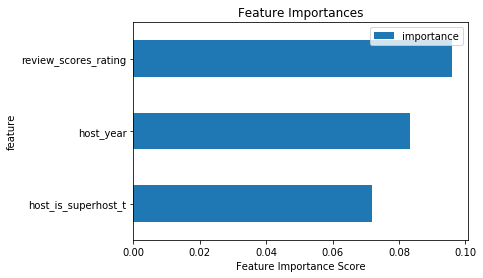

The MSE Score for this model is:  133.1524857753979


In [49]:
mse_score = f.plot_features(master_df, 'number_of_reviews')
print("The MSE Score for this model is: ", mse_score)

Apparently, higher rating does matter in influencing customers' buying decision. This indicates that customers actually look at the ratings before choosing a house. This is strengthened by the second most important feature, which is the host_year. Customers are looking for more experienced host. Being a superhost also helps a lot. Customers tend to choose houses which belongs to superhosts.

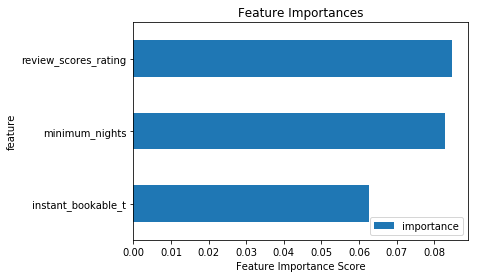

The MSE Score for this model is:  0.3733416655833911


In [50]:
mse_score = f.plot_features(master_df, 'reviews_per_month')
print("The MSE Score for this model is: ", mse_score)

Now, we look at a different proxy of customers' buying decision which is reviews_per_month. Customers look at minimum nights in choosing houses. It seems that they are long-stayers who prefer to stay in a house longer as well. Again, ratings play an important role. The higher the rating is, the more likely customers choose the house. Instant bookable is another feature which is important in customers' buying decision. This indicates that customers look for availability. 

The MSE score for the second model is significantly better than the first model. Therefore, I'm going to use the results from the second model to identify the top 3 things to consider if hosts want to get more bookings.

#### Summing up
By observing the impact of these variables to customers' buying decision (with 2 proxies), we can conclude that there are a few main things to consider if hosts want their properties to be popular / booked:
1. Rating. Getting higher rating is mandatory. Thus, it's better if hosts provide the best service they can.
2. Minimum nights. Airbnb customers seem to be long-stayers. Hosts that provide minimum nights appear more trustworthy, and less guest turnover per night usually means that the rooms will be cleaned regularly, and most of the time, the price is also cheaper.
3. Instant bookability. Customers want fast booking, in the sense that the property must be available during their browsing time.

### What influences customers' rating for a house after they stay on it?
I'm going to use the same function to look at feature importances for rating. 

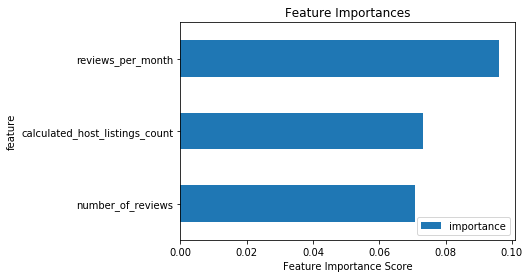

The MSE Score for this model is:  8.16741010983876


In [51]:
mse_score = f.plot_features(master_df, 'review_scores_rating')
print("The MSE Score for this model is: ", mse_score)

It seems that reviews per month play huge role in getting ratings. It can be said that the more a house get booked, the better the ratings. This actually makes sense. A house with more bookings indicate that the customers' stay in the house is satisfactory. Thus, it keeps getting booked. When they are satisfied, they tend to give good ratings as well. Another point to consider is calculated host listings count. This signifies that the hosts have a lot of properties. It can send a message to the customers that this host is serious about the business as he is providing a lot of properties. It might be that these hosts operate professionally.

### What kind of amenities a host should have to be able to give high rating and get customers to use this host's house?
Since it seems that amenities play huge role in predicting ratings, it would make sense to look at the top 3 amenities to be provided if a host want to get high rating and higher booking for his/her properties.

In [52]:
#creating a dictionary of each amenities and the count value
list_amen = master_df.amenities.tolist()
list_amen1 = []
for i in list_amen:
    list_amen1.append(i.split(','))
list_amen2 = []
for i in list_amen1:
    for j in i:
        list_amen2.append(j)
count = Counter(list_amen2)
count = dict(count)

In [53]:
#creating a dataframe with amenities and the number of houses providing the amenities
count_dict = {'amenities_available': list(count.keys()), 'num_amenities': list(count.values())}
count_df = pd.DataFrame.from_dict(count_dict)
count_df[count_df['amenities_available'] == ''] = np.nan
count_df.sort_values(by = 'num_amenities', ascending = False, inplace = True)
count_df.dropna(inplace = True)

In [54]:
count_df.amenities_available.value_counts()

{Internet                                        1
"Air Conditioning"                               1
Essentials                                       1
{Heating                                         1
"translation missing: en.hosting_amenity_49"     1
"Carbon Monoxide Detector"}                      1
"Wireless Internet"                              1
"Other pet(s)"                                   1
Internet                                         1
Washer                                           1
{"Cable TV"                                      1
"Fire Extinguisher"                              1
"Family/Kid Friendly"}                           1
"Carbon Monoxide Detector"                       1
"Washer / Dryer"                                 1
"Pets live on this property"                     1
"Free Parking on Street"                         1
"Elevator in Building"}                          1
"Paid Parking Off Premises"                      1
"Hot Tub"                      

It seems that there are still unclean keys in the dataframe. I will clean this using string replace.

In [55]:
count_df.amenities_available = count_df.amenities_available.str.replace('"', '')
count_df.amenities_available = count_df.amenities_available.str.replace('{', '')
count_df.amenities_available = count_df.amenities_available.str.replace('}', '')

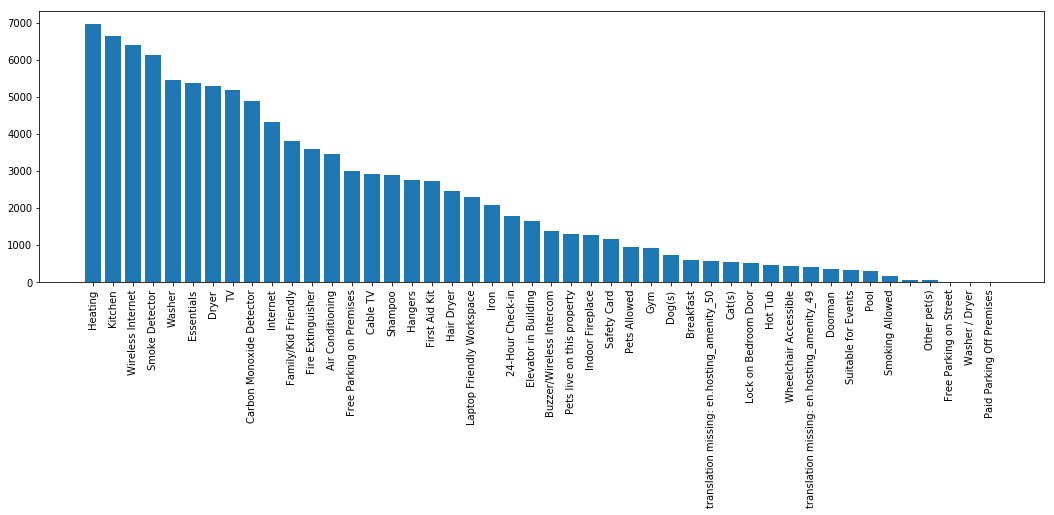

In [56]:
#plotting the number of amenities from the most to the least
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(count_df['amenities_available'], count_df['num_amenities'])
plt.xticks(rotation = 'vertical')
plt.show();

The top 3 amenities that the hosts provide is heating, kitchen, and wifi. I will look at these 3 amenities and compare the ratings and number of reviews between hosts that provide the amenities and hosts that don't provide them. 

In [57]:
def wifi_available(amenities_str):
    '''
    INPUT
        amenities_str - a string of one of the values from the amenities column
    
    OUTPUT
        return 1 if "Wireless Internet" in amenities_str
        return 0 otherwise
    
    '''
    if "Wireless Internet" in amenities_str:
        return 1
    else:
        return 0

In [58]:
def heating_available(amenities_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if "Heating" in amenities_str
        return 0 otherwise
    
    '''
    if "Heating" in amenities_str:
        return 1
    else:
        return 0

In [59]:
def kitchen_available(amenities_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if "Kitchen" in amenities_str
        return 0 otherwise
    
    '''
    if "Kitchen" in amenities_str:
        return 1
    else:
        return 0

In [60]:
#applying function to dataframes
df_amenities = master_df.copy()
df_amenities['wifi_available'] = df_amenities['amenities'].apply(wifi_available)
df_amenities['heating_available'] = df_amenities['amenities'].apply(heating_available)
df_amenities['kitchen_available'] = df_amenities['amenities'].apply(kitchen_available)

In [61]:
df_amenities.head()

,id,picture_url,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,...,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,review_scores_rating,reviews_per_month,wifi_available,heating_available,kitchen_available
0,12147973,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,f,1.0,1.0,t,f,Roslindale,Boston,...,95.2,92.3,1.5,2.0,3.0,96.0,0.163,1,1,1
1,3075044,https://a1.muscache.com/im/pictures/39327812/d...,2572247,f,1.0,1.0,t,t,Roslindale,Boston,...,100.0,100.0,1.0,1.0,1.0,94.0,1.300,1,1,1
2,6976,https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,t,1.0,1.0,t,t,Roslindale,Boston,...,100.0,88.0,1.0,1.0,1.0,98.0,0.470,1,1,1
3,1436513,https://a2.muscache.com/im/pictures/39764190-1...,6031442,f,1.0,1.0,t,f,Roslindale,Boston,...,100.0,50.0,1.0,1.0,2.0,100.0,1.000,1,1,1
4,7651065,https://a1.muscache.com/im/pictures/97154760/8...,15396970,t,1.0,1.0,t,t,Roslindale,Boston,...,100.0,100.0,1.5,1.0,2.0,99.0,2.250,1,1,1


In [62]:
#creating dataframes for plotting
wifi_reviews_df = df_amenities.groupby('wifi_available')['reviews_per_month'].mean()
wifi_rating_df = df_amenities.groupby('wifi_available')['review_scores_rating'].mean()
kitchen_reviews_df = df_amenities.groupby('kitchen_available')['reviews_per_month'].mean()
kitchen_rating_df = df_amenities.groupby('kitchen_available')['review_scores_rating'].mean()
heating_reviews_df = df_amenities.groupby('heating_available')['reviews_per_month'].mean()
heating_rating_df = df_amenities.groupby('heating_available')['review_scores_rating'].mean()

In [63]:
#getting the mean values of each dataframe into a tuple for plotting purposes
rating_1_means = (wifi_rating_df[1], kitchen_rating_df[1], heating_rating_df[1])
rating_0_means = (wifi_rating_df[0], kitchen_rating_df[0], heating_rating_df[0])
reviews_1_means = (wifi_reviews_df[1], kitchen_reviews_df[1], heating_reviews_df[1])
reviews_0_means = (wifi_reviews_df[0], kitchen_reviews_df[0], heating_reviews_df[0])


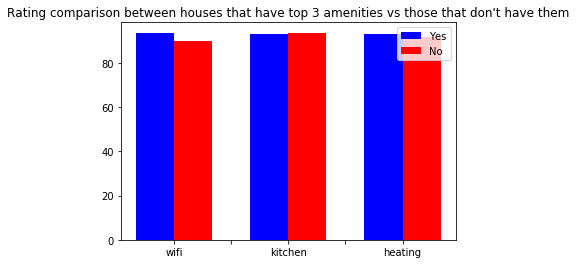

In [64]:
f.plot_amenities(rating_1_means, rating_0_means, "Rating comparison between houses that have top 3 amenities vs those that don't have them")

Based on the plot, wifi plays an important role in getting the ratings. Hosts who provide wifi tend to get higher ratings compared to those who don't. However, the difference in rating for hosts who provide kitchen and heating seems to be less significant. I guess, customers don't really care whether they can cook or not. As for heating, hosts who provide heating tend to get slightly higher rating.  

It can be said that while most hosts provide kitchen, they don't actually matter in giving them higher rating. This is similar to heating. Wifi is the most important amenities to gain good ratings.

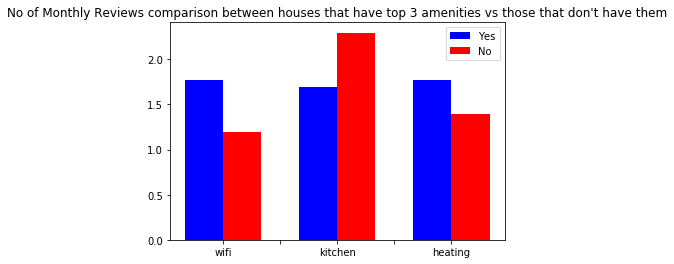

In [65]:
f.plot_amenities(reviews_1_means, reviews_0_means, "No of Monthly Reviews comparison between houses that have top 3 amenities vs those that don't have them")

Again, wifi plays important role in customers' buying decision. Hosts who provide wifi get their property booked a lot more than those who don't. Interestingly, customers tend to book properties without kitchen. Maybe, houses with kitchen have higher price. I will look at this later. Houses with heating tend to get more booking as well. Probably in the US, heating is important if customers travel in winter.

In [66]:
kitchen_reviews_df = df_amenities.groupby('kitchen_available')['price'].mean()

In [67]:
kitchen_reviews_df

kitchen_available
0    108.841954
1    154.516629
Name: price, dtype: float64

As I suspected, houses with kitchen has higher average price. This contradicts previous findings stating the higher the price, the higher the customers' buying decision. Probably, the impact is not significant. However, customers tend to prefer longer stay. Usually, hosts provide cheaper price if customers book for a long stay. Thus, the influence of price to customers' buying decision need to be looked at more in details. Needless to say, more research is needed on this.

## Deployment
As this project is meant just to give insight, I published the results of these findings [here](https://medium.com/@agustinus.thehub/this-is-how-you-get-more-bookings-and-higher-ratings-as-airbnb-host-ff2846834b3e)

# Conclusion
I did all this to answer the question: 'How do people profit from becoming Airbnb hosts?'. I can conclude that to do that:
1. We need to provide the best service we can. It's easy to say, difficult to do (as a former hotelier, I can assure you this). If we do that, we can be given a chance to be promoted to superhost. If we get to superhost, it means that we get high ratings most of the time. Higher ratings mean higher bookings.
2. Provide neccessary amenities. Customers don't really care about certain amenities such as kitchen. Moreover, providing unneeded amenities might increase price since people invested on these amenities. 

## Limitations:
1. In filling the NaN values, I used mostly machine learning techniques. Actually, in my last Udacity project, a reviewer told me that we can fill NaN values using this and I wanted to try it. I'm not really sure that it's right or wrong.
2. I made a couple of assumptions such as the NaN values of cleaning fee is actually 0 (the host doesn't ask for cleaning fee) and the NaN values for host_year is also 0, indicating that these hosts are new host with 0 year experience. I could be wrong.